## 简单图像检索

In [29]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
from PIL import Image
import pandas as pd
from FeatureExtractor import extractor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
# 抽取数据集所有特征
path = './data'
feats, image_list = extractor(path)

Feature extraction complete in 4.86s


In [31]:
# 待搜索的图片
test = './test'
feat_single, image = extractor(test)


Feature extraction complete in 0.02s


In [32]:
# 按照相似度从大到小排列
scores  = np.dot(feat_single, feats.T)
sort_ind = np.argsort(scores)[0][::-1]
scores = scores[0, sort_ind]

top 10 images in order are:  ['179.jpg', '5.jpg', '35.jpg', '130.jpg', '165.jpg', '30.jpg', '128.jpg', '82.jpg', '115.jpg', '72.jpg']


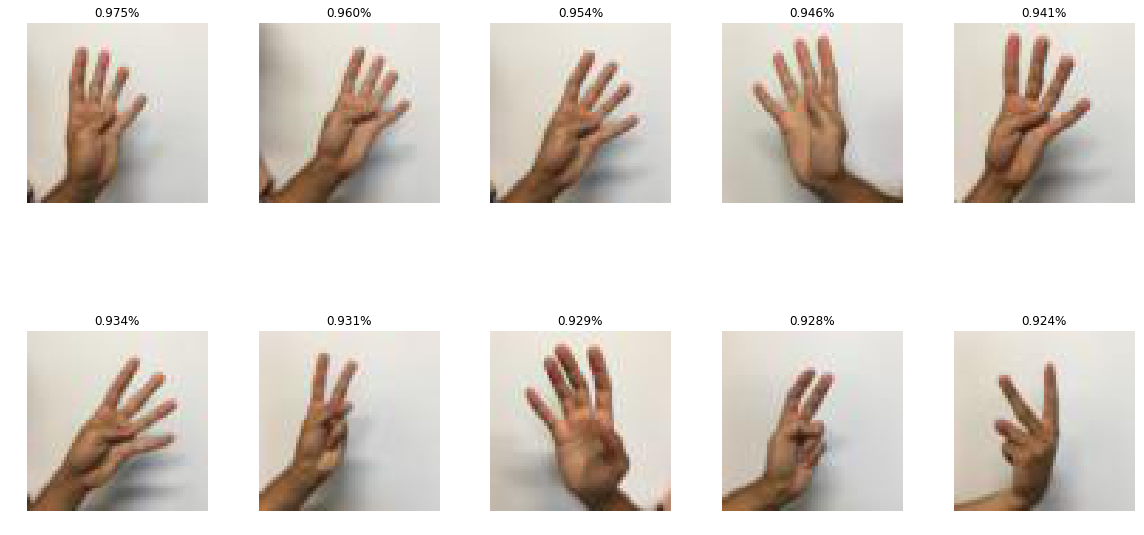

In [33]:
maxres = 10
imlist = [image_list[index] for i, index in enumerate(sort_ind[0:maxres])]
print ("top %d images in order are: " %maxres, imlist)

fig=plt.figure(figsize=(16, 10))
for i in range(len(imlist)):
    sample = imlist[i]
    img = mpimg.imread('./data' + '/' + sample)
    #ax = plt.subplot(figsize)
    ax = fig.add_subplot(2, 5, i+1)
    ax.autoscale()
    plt.tight_layout()
    plt.imshow(img, interpolation='nearest')
    ax.set_title('{:.3f}%'.format(scores[i]))
    ax.axis('off')
plt.show()

